In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/grad_cafe_data.csv")

In [86]:
df.head()

,school,program,added_on,decision,GPA,GRE,GRE_V,GRE_Q,GRE_AW,TOEFL,IELTS
0,University of Colorado Boulder,Creative Technology and Design,"July 17, 2025",Accepted on 6 Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arizona State University,COmputer,"July 17, 2025",Accepted on 17 Jul,2.59,NaN,NaN,NaN,NaN,NaN,NaN
2,University of Colorado at Denver,Master of Science in Clinical Psychopharmacology,"July 16, 2025",Accepted on 16 Jul,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Johns Hopkins University,Computer Science,"July 16, 2025",Accepted on 14 Jul,2.40,NaN,NaN,NaN,NaN,NaN,NaN
4,Hofstra,Speech Language Pathology,"July 15, 2025",Accepted on 14 Jan,3.50,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df['decision'].unique()

array(['Accepted on 6 Mar', 'Accepted on 17 Jul', 'Accepted on 16 Jul',
       ..., 'Wait-Listed on 4 Feb', 'Wait-Listed on 8 Feb',
       'Wait-Listed on 30 Nov'], shape=(1220,), dtype=object)

In [87]:
df.isna().sum() / 126000

school      0.047683
program     0.048254
added_on    0.047627
decision    0.047619
GPA         0.711246
GRE         0.810960
GRE_V       0.815468
GRE_Q       1.000000
GRE_AW      0.823278
TOEFL       1.000000
IELTS       1.000000
dtype: float64

In [88]:
df_clean = df.drop(columns=['GRE_Q' , 'TOEFL' , 'IELTS' , 'added_on'] , axis= 1)

In [89]:
df_clean.isna().sum()

school        6008
program       6080
decision      6000
GPA          89617
GRE         102181
GRE_V       102749
GRE_AW      103733
dtype: int64

In [90]:
df_clean = df_clean.dropna(axis=0)

In [91]:
df_clean.isna().sum()

school      0
program     0
decision    0
GPA         0
GRE         0
GRE_V       0
GRE_AW      0
dtype: int64

In [92]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19911 entries, 12 to 115954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   school    19911 non-null  object 
 1   program   19911 non-null  object 
 2   decision  19911 non-null  object 
 3   GPA       19911 non-null  float64
 4   GRE       19911 non-null  float64
 5   GRE_V     19911 non-null  float64
 6   GRE_AW    19911 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.2+ MB


In [93]:
df_clean.describe()

,GPA,GRE,GRE_V,GRE_AW
count,19911.000000,19911.000000,19911.000000,19911.000000
mean,3.712731,333.964743,300.870524,4.901346
std,0.520438,265.013996,224.429485,7.030070
min,1.000000,2.000000,2.000000,1.000000
25%,3.510000,159.000000,157.000000,4.000000
50%,3.740000,167.000000,163.000000,4.500000
75%,3.900000,650.000000,530.000000,5.000000
max,9.990000,970.000000,800.000000,99.990000


In [111]:
df_clean['decision_binary'] = df_clean['decision'].str.startswith('Accepted').fillna(False).astype(int)


In [112]:
df_clean['decision_binary'].unique()

array([0, 1])

In [113]:
df_clean.drop(columns=['decision'])

,school,program,GPA,GRE,GRE_V,GRE_AW,decision_binary
12,University at Buffalo-SUNY,Mechanical And Aerospace Engineering,3.52,319.0,156.0,3.5,0
43,Rensselaer Polytechnic Institute,Biomedical Engineering,3.43,165.0,157.0,4.0,0
44,University of Maryland Baltimore County,Computer Science,3.92,326.0,166.0,4.0,1
51,Purdue University,Management,3.97,325.0,158.0,4.0,0
66,University of Illinois Urbana-Champaign,Mechanical Engineering,3.97,317.0,155.0,4.5,0
...,...,...,...,...,...,...,...
115940,"University Of California, San Francisco (UCSF)",Neuroscience,3.90,740.0,620.0,4.5,0
115946,Duke University,Statistics,3.70,800.0,580.0,5.5,0
115948,Carnegie Mellon,Biological Sciences (Neuroscience),3.40,800.0,690.0,5.0,0
115953,"University Of California, San Francisco (UCSF)",Neuroscience,3.86,800.0,610.0,4.0,0


In [114]:
corr_matrix = df_clean.select_dtypes(include="number").corr()
corr_matrix

,GPA,GRE,GRE_V,GRE_AW,decision_binary
GPA,1.000000,-0.023813,-0.020611,0.015520,0.026967
GRE,-0.023813,1.000000,0.939123,-0.016465,-0.018734
GRE_V,-0.020611,0.939123,1.000000,-0.025739,-0.020179
GRE_AW,0.015520,-0.016465,-0.025739,1.000000,0.002585
decision_binary,0.026967,-0.018734,-0.020179,0.002585,1.000000


<Axes: >

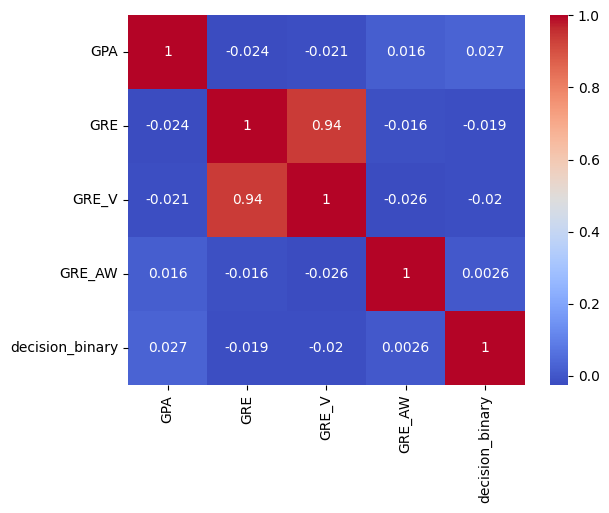

In [115]:
sns.heatmap(corr_matrix ,annot=True, cmap="coolwarm")